# Example of validity of filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from empymod import dipole

# Style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['text.usetex'] = True  # Comment this if you don't have LaTeX. You might have to adjust some strings.
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'

In [2]:
# Define powers of frequency
fexp = np.arange(-6., 12.1, 1.)

# Define powers of resistivity
rexp = np.arange(-2, 6.1, 0.5)

# Fixed parameters
params = {
    'depth': [],
    'ht': 'fht',
    'htarg': 'wer_201_2018',
    'verb': 1
}

# Pre-allocate output arrays
error = np.ones((len(fexp), len(rexp)))
ansol = np.ones((len(fexp), len(rexp)))

# Loop over frequencies
for i, val in enumerate(fexp):
    off = 10**(-val/2)*1000 
    freq = 10**val

    # Loop over resistivities
    for ii, val2 in enumerate(rexp):
        res = 10**val2
        an_out = dipole([0, 0, 0], [off, 0, off/10], res=res, freqtime=freq, xdirect=True, **params)
        dlf_out = dipole([0, 0, 0], [off, 0, off/10], res=res, freqtime=freq, xdirect=False, **params)
        error[i, ii] = 100*np.abs((dlf_out-an_out)/an_out)
        ansol[i, ii] = np.abs(an_out)

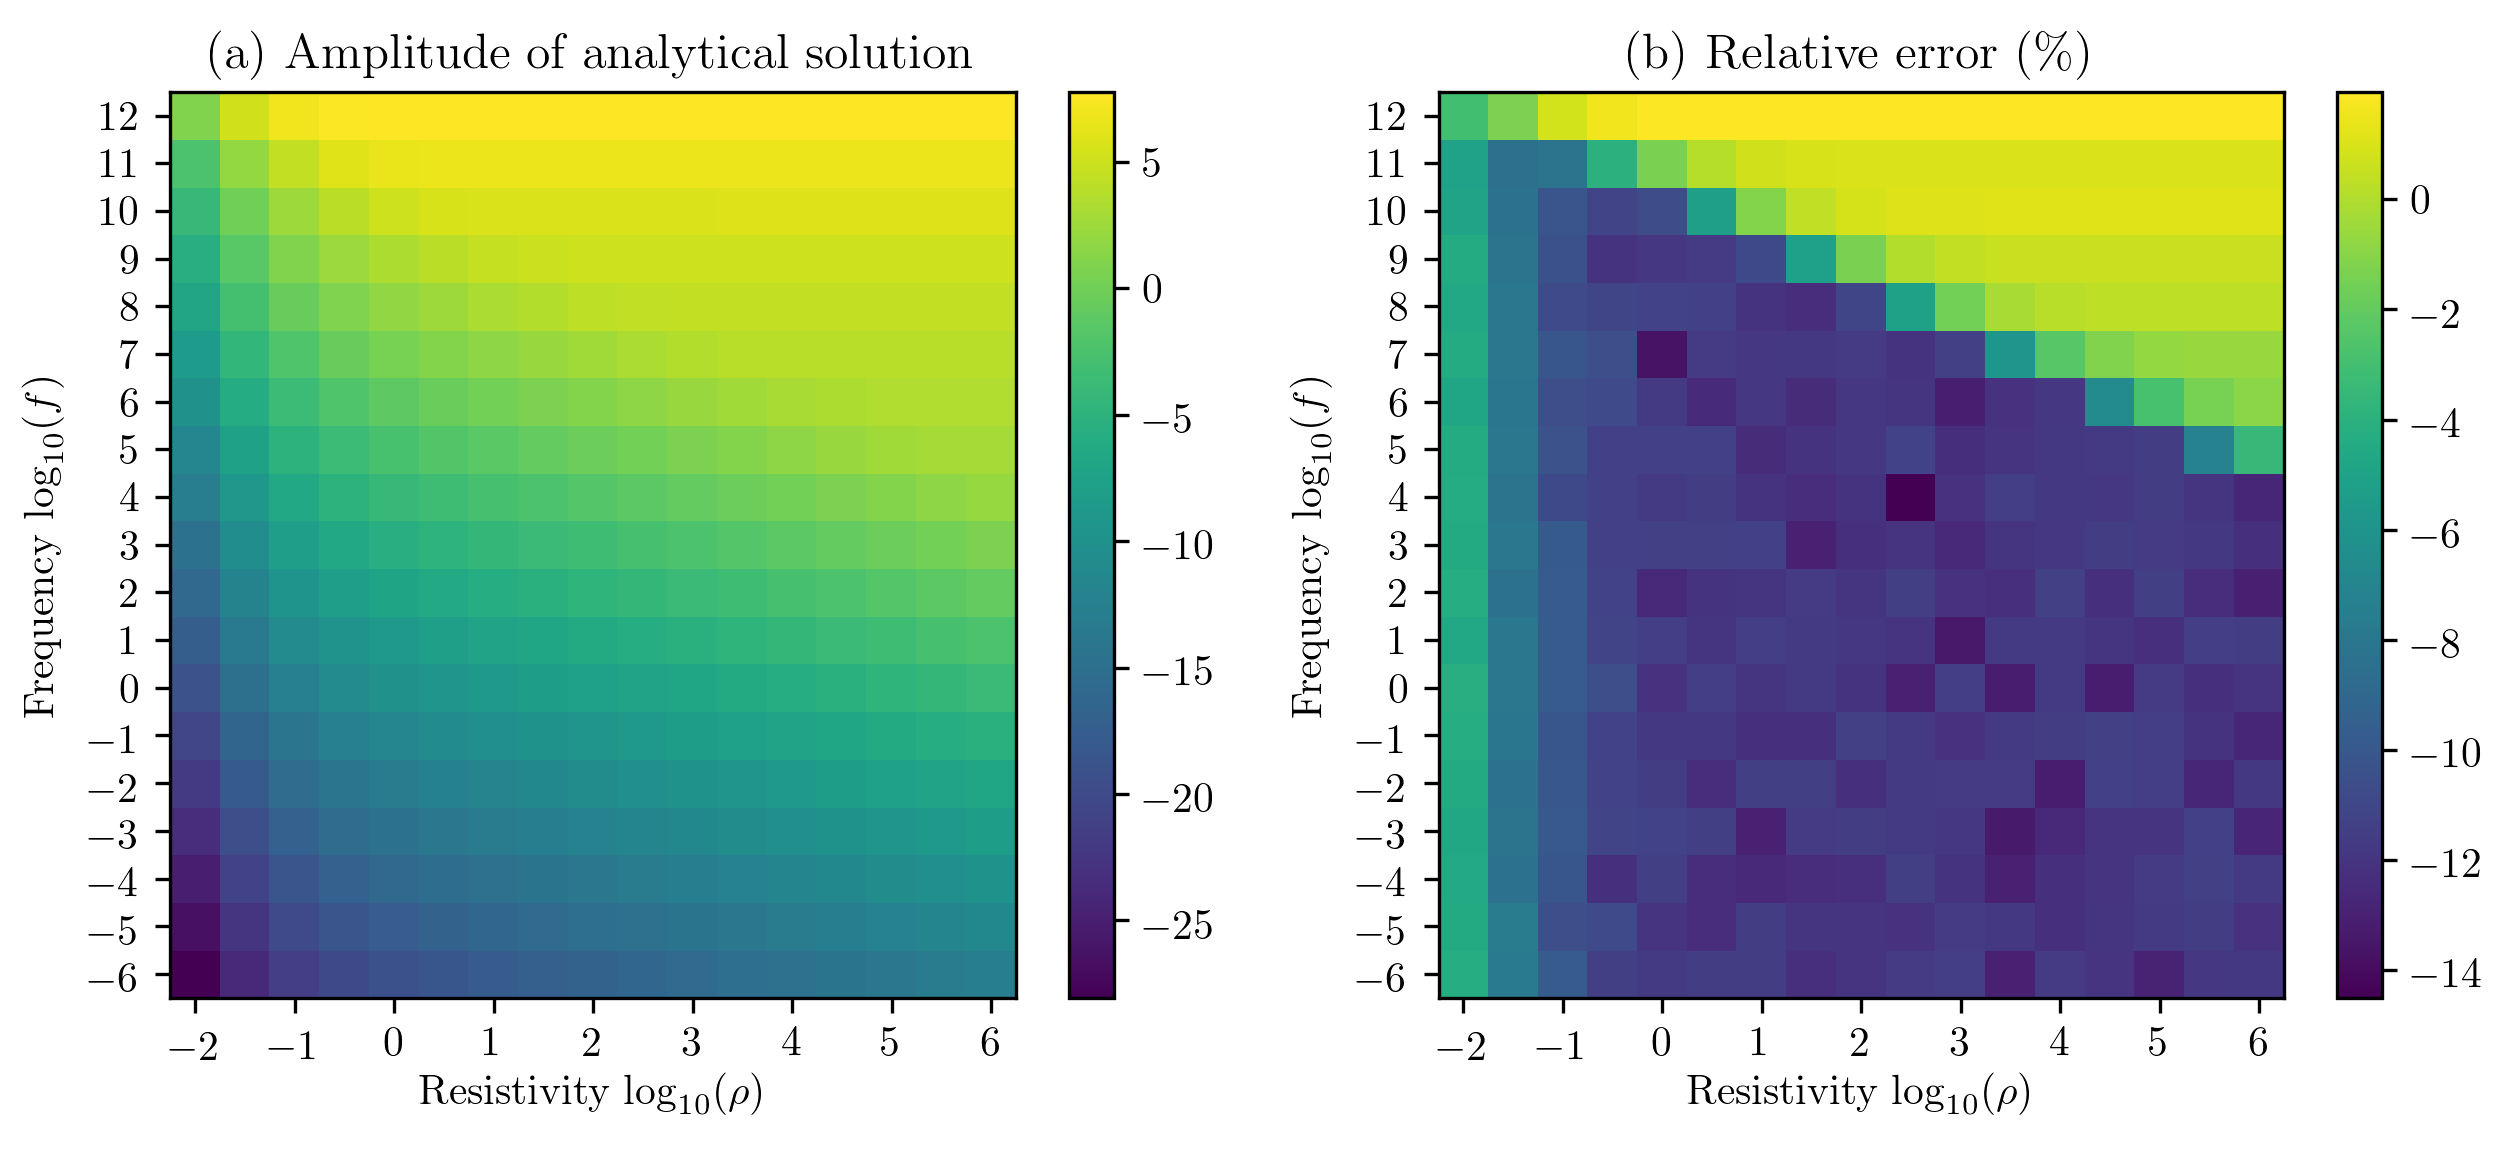

In [3]:
plt.figure(figsize=(10, 4))

x = np.r_[rexp-0.25, rexp[-1]+0.25]
y = np.r_[fexp-0.5, fexp[-1]+0.5]
          
plt.subplot(121)
plt.title('(a) Amplitude of analytical solution')
plt.pcolormesh(x, y, np.log10(ansol), linewidth=0, rasterized=True)
plt.xlabel(r'Resistivity $\log_{10}(\rho)$')
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.yticks(fexp)
plt.xticks(rexp[::2])
plt.colorbar()

plt.subplot(122)
plt.title('(b) Relative error ($\%$)')
plt.pcolormesh(x, y, np.log10(error), linewidth=0, rasterized=True)
plt.xlabel(r'Resistivity $\log_{10}(\rho)$')
plt.ylabel(r'Frequency $\log_{10}(f)$')
plt.yticks(fexp)
plt.xticks(rexp[::2])
plt.colorbar()

plt.savefig('../figures/validity.pdf', bbox_inches='tight')
plt.show()

In [4]:
import printinfo
printinfo.info()